In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### 1.	Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.

#### 2.	Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.


#### 3.	Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?


In [2]:
ecom_df = pd.read_csv("../Datasets/ecom_data.csv",encoding='unicode_escape')
ecom_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
display(ecom_df.shape)
display(ecom_df.info())
display(ecom_df.nunique())
ecom_df.isna().sum()

(541909, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
ecom_df['CustomerID'] = ecom_df['CustomerID'].fillna(0)
ecom_df['CustomerID'] = ecom_df['CustomerID'].astype(int)
ecom_df['Description'] = ecom_df['Description'].fillna('N/A') 
ecom_df['InvoiceDate'] = pd.to_datetime(ecom_df['InvoiceDate'])

In [5]:
ecom_df['Country_id'], Country_name = pd.factorize(ecom_df['Country'])
ecom_df['Stock_id'], Stock = pd.factorize(ecom_df['StockCode'])
ecom_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_id,Stock_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,4


In [7]:
for index, num in ecom_df['InvoiceNo'].items():
    if num.isdigit() == False:
        num = filter(str.isdigit, num)
        num = "".join(num)
        ecom_df['InvoiceNo'][index] = num

C:\Users\saksh\AppData\Local\Temp/ipykernel_14088/2278406559.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_df['InvoiceNo'][index] = num


In [8]:
ecom_df['InvoiceNo'] = ecom_df['InvoiceNo'].astype(int)

#### 4.	Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?


In [129]:
ecom_group = ecom_df.groupby('CustomerID')
X = ecom_group.agg({# Sum of quantity to find the total items purchased
                           'Quantity':'sum',
                           # mean of unit price to find the average price of one item
                           'UnitPrice': 'mean',
                           # unique country
                           'Country_id': 'min',
                           # Max invoice date to see the most recent purchase
                           'Stock_id': 'min',
                           # unique invoice numbers to see total purchases
                          'InvoiceNo':'nunique'})

In [130]:
X.head()

,Quantity,UnitPrice,Country_id,Stock_id,InvoiceNo
CustomerID,,,,,
0,269562,8.076577,0,0,3710
12346,0,1.040000,0,2952,2
12347,2458,2.644011,15,14,7
12348,2341,5.764839,22,45,4
12349,631,8.289041,11,21,1


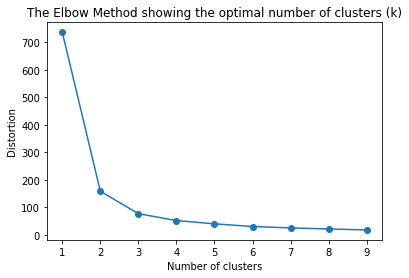

In [131]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

norm = Normalizer()
X_norm = norm.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=['Quantity','UnitPrice','Country_id','Stock_id','InvoiceNo'])

i = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_norm)
    i.append(kmeanModel.inertia_)

plt.plot(K, i, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters (k)')

plt.show()

In [144]:
kmodel = KMeans(n_clusters=3)
kmodel.fit(X_norm)
segment = kmodel.predict(X_norm)

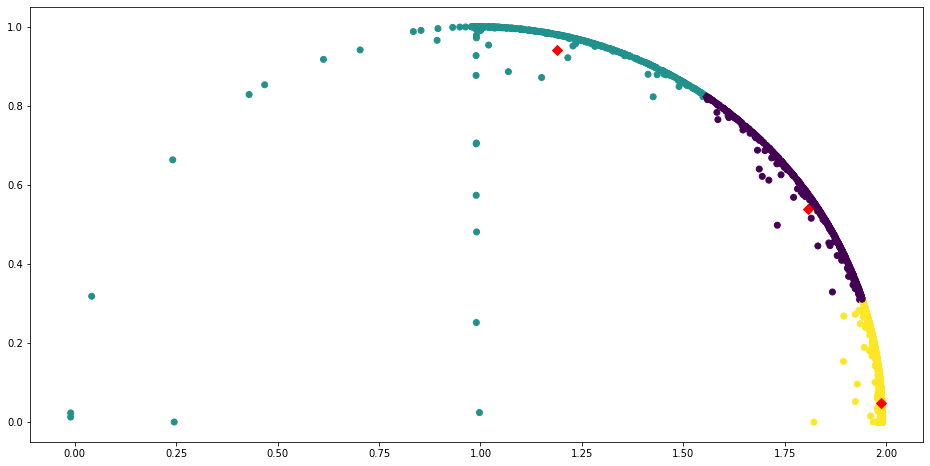

In [145]:
price = X_norm.iloc[:,0]
country = X_norm.iloc[:,3]

centroids = kmodel.cluster_centers_

# Extract the centroids from the columns (0 and 4)
centroids_x = centroids[:,0]
centroids_y = centroids[:,3]

plt.figure(figsize=(16,8))
# Make a scatter plot of the scaled data with their centroids
plt.scatter(price, country, c=segment)
plt.scatter(centroids_x, centroids_y, marker='D', c='red', s=50)

# View plot
plt.show()

#### 5.	Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?


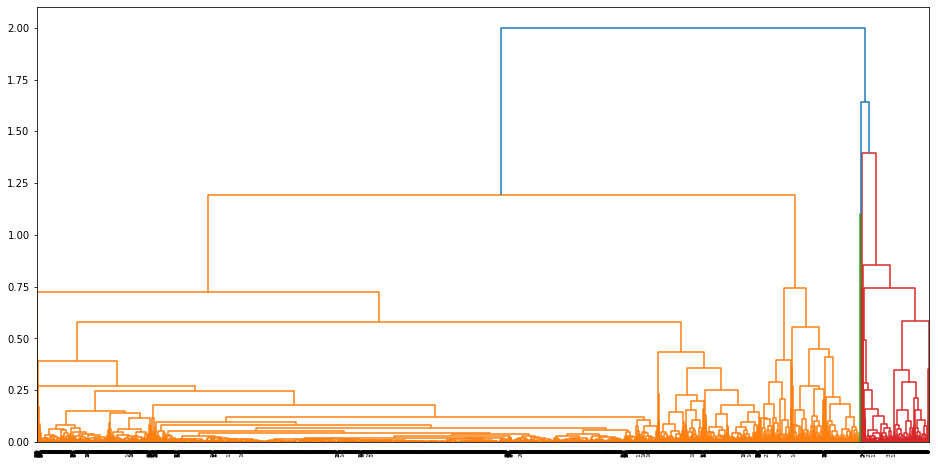

In [152]:
from scipy.cluster.hierarchy import linkage, dendrogram


# Calculate the linkage
linked = linkage(X_norm, method='complete')

# Plot the dendrogram to visualize clusters
plt.figure(figsize=(16,8))
dendrogram(linked, 
           labels=list(X['Country_id']),
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

#### 6.	Compare the results of 4 and 5. Which approach do you think is best? Why? 

#### DataCamp's Unsupervised Learning in Python

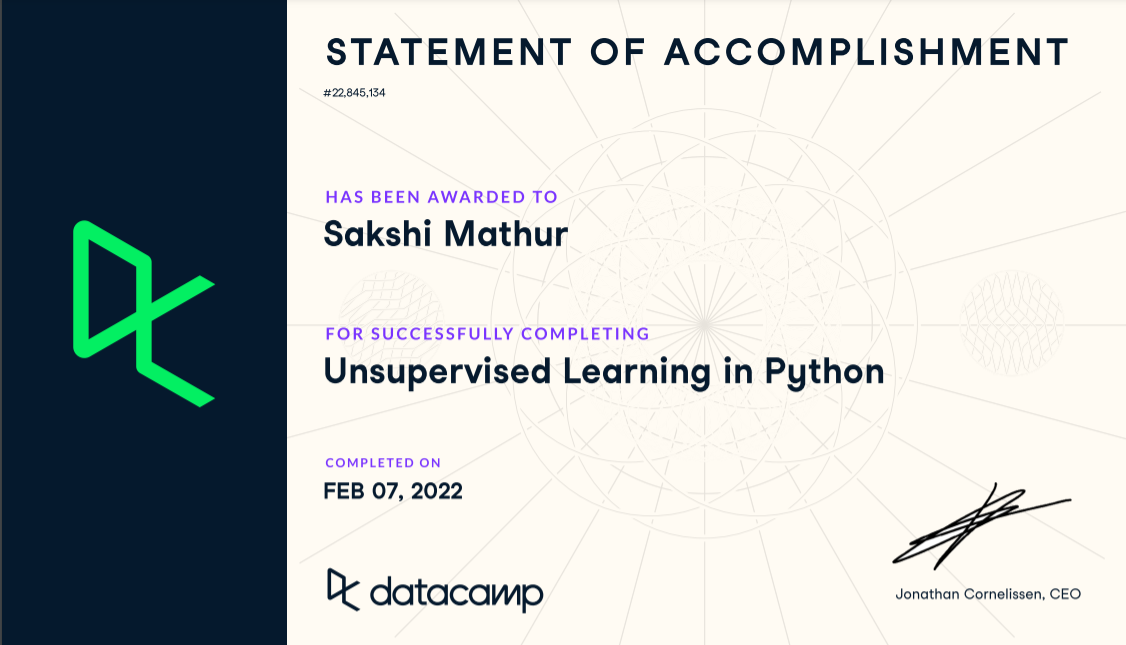